In [1]:
import pandas as pd
import numpy as np
import MySQLdb
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
import numpy as np

In [2]:
db = MySQLdb.connect(host='104.154.94.28',db='loganp',\
                     read_default_file="~/.my.cnf",\
                     autocommit=True,\
                     local_infile = 1)

In [3]:
# NGC 1399 is the center of the cluster, as given in their paper:
RA,Dec='03 38 29.083', '-35 27 02.67'
c = SkyCoord(ra=RA, dec=Dec, unit=(u.hourangle, u.deg))
RA,Dec = c.ra.degree,c.dec.degree
RA,Dec

RA2,Dec2='03 22 41.789', '-37 12 29.52'
c = SkyCoord(ra=RA2, dec=Dec2, unit=(u.hourangle, u.deg))
RA2,Dec2 = c.ra.degree,c.dec.degree
RA2,Dec2

(50.674120833333326, -37.208200000000005)

https://arxiv.org/pdf/1709.01289.pdf<br>
There are 86 pointings identified, but I don't know the RA/Dec of each.<br>
The box given in the paper within which Fornax pointings are is about 7 deg x 6 deg.  So I will find targets within that box.  It includes the magenta circle in the paper which indicates the virial radius of the cluster.

In [23]:
k=pd.read_table('mfs_pointingcentres_2018_radec.txt',comment='#',delim_whitespace=True)
k

,RA(J2000),Dec(J2000)
0,54.401986,-35.499831
1,53.446143,-35.499831
2,52.490301,-35.499831
3,51.534458,-35.499831
4,55.357828,-35.499831
5,56.313670,-35.499831
6,54.400748,-35.949106
7,53.439500,-35.949106
8,52.478251,-35.949106
9,51.517003,-35.949106


The points are the individual pointings from Paolo Serra.  I got all objects in the catalog within the blue box to be conservative, and easily avoid a lot of overlaps.

<IPython.core.display.Javascript object>


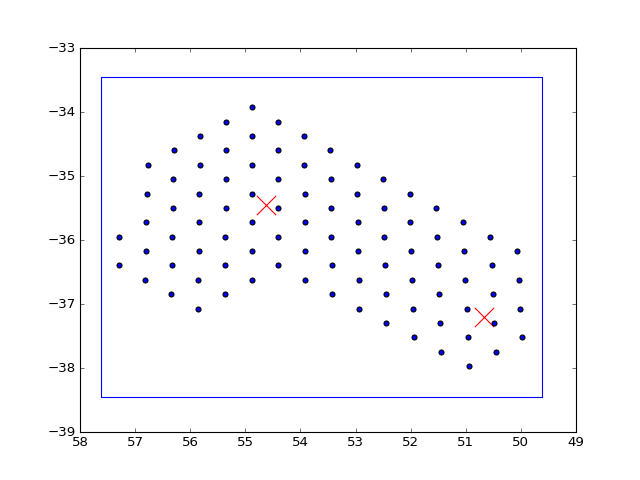

In [25]:
box_x = [RA-5,RA+3]
box_y = [Dec-3.,Dec+2]

%matplotlib notebook
plt.plot([box_x[0],box_x[0],box_x[1],box_x[1],box_x[0]],[box_y[0],box_y[1],box_y[1],box_y[0],box_y[0]])
plt.scatter(RA,Dec,marker='x',color='red',s=300)
plt.scatter(RA2,Dec2,marker='x',color='red',s=300)
plt.scatter(k['RA(J2000)'],k['Dec(J2000)'])
plt.xlim(58,49)
plt.show()
plt.savefig('fornax_pointings_and_box.png',format='png',dpi=300)

In [13]:
print box_x,box_y

[49.621179166666664, 57.621179166666664] [-38.45074166666667, -33.45074166666667]


In [14]:
string="SELECT * FROM `master_gaia_database` \
        WHERE ra BETWEEN "+str(box_x[0])+" AND "+str(box_x[1])+" \
        AND decl BETWEEN "+str(box_y[0])+" AND "+str(box_y[1])+";"
targets = pd.read_sql(string, con=db)

In [15]:
targets['project'],targets['name']='Fornax','Fornax'
targets

,Ind,source_id,ref_epoch,ra,ra_error,decl,dec_error,parallax,parallax_error,parallax_over_error,...,lum_percentile_upper,lum_percentile_lower,dist_c,fwhm_lo_c,fwhm_hi_c,sd_c,teff_val_c,sptype_c,project,name
0,966,4856592239127350400,2015.5,56.0394,0.016655,-38.2805,0.022850,61.845100,0.021898,2824.2300,...,0.423926,0.423336,16.1694,16.1627,16.1762,0.005725,0.0,K1.5V,Fornax,Fornax
1,4316,4860542440808594816,2015.5,51.9441,0.020443,-36.5781,0.029243,38.111500,0.032156,1185.2100,...,0.000000,0.000000,26.2388,26.2128,26.2649,0.022137,0.0,M1V,Fornax,Fornax
2,6714,5053344759676571392,2015.5,49.7365,0.032739,-34.5549,0.052783,32.807400,0.058549,560.3450,...,0.000000,0.000000,30.4811,30.4172,30.5453,0.054394,0.0,M1.5V,Fornax,Fornax
3,8879,4856589593427491328,2015.5,56.2013,0.025903,-38.3362,0.034982,29.866300,0.037255,801.6620,...,0.000000,0.000000,33.4827,33.4336,33.5319,0.041764,0.0,K9V,Fornax,Fornax
4,8889,4856589593426369280,2015.5,56.2012,0.039233,-38.3354,0.030460,29.854300,0.035952,830.3950,...,0.000000,0.000000,33.4961,33.4487,33.5437,0.040335,0.0,M3V,Fornax,Fornax
5,9192,4861465755697888768,2015.5,52.5755,0.023150,-34.0431,0.030345,29.491200,0.037844,779.2900,...,0.000000,0.000000,33.9085,33.8573,33.9598,0.043509,0.0,M1V,Fornax,Fornax
6,9619,4860061541910268160,2015.5,55.0456,0.040165,-36.1774,0.051347,29.071600,0.057237,507.9170,...,0.000000,0.000000,34.3980,34.3185,34.4780,0.067720,0.0,G2V,Fornax,Fornax
7,9841,4853649671133470080,2015.5,52.4599,0.029170,-38.2003,0.040844,28.848900,0.042498,678.8310,...,0.000000,0.000000,34.6636,34.6035,34.7238,0.051060,0.0,K9V,Fornax,Fornax
8,10275,4855844261982655872,2015.5,57.1056,0.023016,-38.3108,0.030841,28.421200,0.031721,895.9630,...,0.000000,0.000000,35.1850,35.1389,35.2313,0.039268,0.0,M0.5V,Fornax,Fornax
9,12319,4853458081231863424,2015.5,52.6528,0.018623,-38.3240,0.023214,26.791600,0.025707,1042.2000,...,0.000000,0.000000,37.3251,37.2830,37.3674,0.035811,0.0,K7V,Fornax,Fornax


In [16]:
targets.to_csv('../Our_targets/fornax.csv',index=False)

In [17]:
print targets.shape

(14356, 57)


In [19]:
targets=targets.rename(columns={'dist_c':'dist.c','fwhm_lo_c':'fwhm_lo.c','fwhm_hi_c':'fwhm_hi.c',\
                                'sd_c':'sd.c','teff_val_c':'teff_val.c','sptype_c':'sptype.c'})

In [21]:
targets.to_csv('../Our_targets/fornax.csv',index=False)

In [18]:
k=pd.read_csv('../Our_targets/fornax.csv')
k

,Ind,source_id,ref_epoch,ra,ra_error,decl,dec_error,parallax,parallax_error,parallax_over_error,...,lum_percentile_upper,lum_percentile_lower,dist_c,fwhm_lo_c,fwhm_hi_c,sd_c,teff_val_c,sptype_c,project,name
0,966,4856592239127350400,2015.5,56.0394,0.016655,-38.2805,0.022850,61.845100,0.021898,2824.2300,...,0.423926,0.423336,16.1694,16.1627,16.1762,0.005725,0.0,K1.5V,Fornax,Fornax
1,4316,4860542440808594816,2015.5,51.9441,0.020443,-36.5781,0.029243,38.111500,0.032156,1185.2100,...,0.000000,0.000000,26.2388,26.2128,26.2649,0.022137,0.0,M1V,Fornax,Fornax
2,6714,5053344759676571392,2015.5,49.7365,0.032739,-34.5549,0.052783,32.807400,0.058549,560.3450,...,0.000000,0.000000,30.4811,30.4172,30.5453,0.054394,0.0,M1.5V,Fornax,Fornax
3,8879,4856589593427491328,2015.5,56.2013,0.025903,-38.3362,0.034982,29.866300,0.037255,801.6620,...,0.000000,0.000000,33.4827,33.4336,33.5319,0.041764,0.0,K9V,Fornax,Fornax
4,8889,4856589593426369280,2015.5,56.2012,0.039233,-38.3354,0.030460,29.854300,0.035952,830.3950,...,0.000000,0.000000,33.4961,33.4487,33.5437,0.040335,0.0,M3V,Fornax,Fornax
5,9192,4861465755697888768,2015.5,52.5755,0.023150,-34.0431,0.030345,29.491200,0.037844,779.2900,...,0.000000,0.000000,33.9085,33.8573,33.9598,0.043509,0.0,M1V,Fornax,Fornax
6,9619,4860061541910268160,2015.5,55.0456,0.040165,-36.1774,0.051347,29.071600,0.057237,507.9170,...,0.000000,0.000000,34.3980,34.3185,34.4780,0.067720,0.0,G2V,Fornax,Fornax
7,9841,4853649671133470080,2015.5,52.4599,0.029170,-38.2003,0.040844,28.848900,0.042498,678.8310,...,0.000000,0.000000,34.6636,34.6035,34.7238,0.051060,0.0,K9V,Fornax,Fornax
8,10275,4855844261982655872,2015.5,57.1056,0.023016,-38.3108,0.030841,28.421200,0.031721,895.9630,...,0.000000,0.000000,35.1850,35.1389,35.2313,0.039268,0.0,M0.5V,Fornax,Fornax
9,12319,4853458081231863424,2015.5,52.6528,0.018623,-38.3240,0.023214,26.791600,0.025707,1042.2000,...,0.000000,0.000000,37.3251,37.2830,37.3674,0.035811,0.0,K7V,Fornax,Fornax
